In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png')
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
#plt.style.use('seaborn-white')

# 4.1 Getting started with classification – Breast cancer diagnosis

In this exercise, we will consider the data set `data/biopsy.csv` with data from breast biopsies, for the purpose of diagnosing breast cancer. For each patient, the data set contains nine different attributes (clump thickness, uniformity of cell size, uniformity of cell shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nucleoli and mitoses) scored on a scale from $1$ to $10$, as well as the physician’s diagnosis (malign or benign).

## Dataset
This data frame `biopsy` contains the following columns:  
`ID`: sample code number (not unique).  
`V1`: clump thickness.  
`V2`: uniformity of cell size.  
`V3`: uniformity of cell shape.  
`V4`: marginal adhesion.  
`V5`: single epithelial cell size.  
`V6`: bare nuclei (16 values are missing).  
`V7`: bland chromatin.  
`V8`: normal nucleoli.  
`V9`: mitoses.  
`class`: "benign" or "malignant".  

## a)
Load and familiarize yourself with the data set, using, e.g.`info()`, `describe()`, `pandas.plotting.scatter_matrix()` and `print()`.

In [3]:
# url = 'data/biopsy.csv'
url = 'https://uu-sml.github.io/course-sml-public/data/biopsy.csv'
biopsy = pd.read_csv(url, na_values='?', dtype={'ID': str}).dropna().reset_index()
biopsy.head()

,index,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,4,1017023,4,1,1,3,2,1.0,3,1,1,benign


     index       ID  V1  V2  V3  V4  V5    V6  V7  V8  V9      class
0        0  1000025   5   1   1   1   2   1.0   3   1   1     benign
1        1  1002945   5   4   4   5   7  10.0   3   2   1     benign
2        2  1015425   3   1   1   1   2   2.0   3   1   1     benign
3        3  1016277   6   8   8   1   3   4.0   3   7   1     benign
4        4  1017023   4   1   1   3   2   1.0   3   1   1     benign
..     ...      ...  ..  ..  ..  ..  ..   ...  ..  ..  ..        ...
678    694   776715   3   1   1   1   3   2.0   1   1   1     benign
679    695   841769   2   1   1   1   2   1.0   1   1   1     benign
680    696   888820   5  10  10   3   7   3.0   8  10   2  malignant
681    697   897471   4   8   6   4   3   4.0  10   6   1  malignant
682    698   897471   4   8   8   5   4   5.0  10   4   1  malignant

[683 rows x 12 columns]


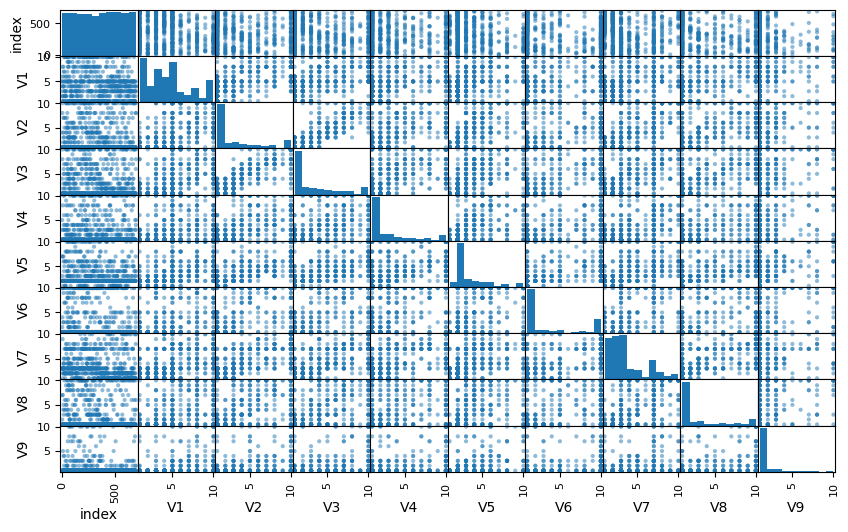

In [4]:
#biopsy.info()
#biopsy.describe()
pd.plotting.scatter_matrix(biopsy)
plt.show
print(biopsy)

## b)
Split the data randomly into a training set and a test set of approximately similar size.

In [5]:
import math
np.random.seed(1)
rows= biopsy.shape[0]
trainI = np.random.choice(rows, math.floor(rows/2) ,replace=False)
trainIndex = biopsy.index.isin(trainI)
train = biopsy[trainIndex]
test = biopsy[~trainIndex]
print(trainI)
print('train head:', train.head())
print('test head:', test.head())


[429  23 189  47 361 590 557 455 620 499 465 630 593  41 483 304 677 426
 520  81 445 570 638 101  65 118 539  59 680  57  19 328  60 173 134  56
 378 248 180 293 245 117 365 161 506 607 651 618  66 648 355 603 274 657
 159 459  35 563  92 172 473 277 257 350 544 412 460  69 597 392  13 104
 546 432 314 496 661 487 261 655 351 547 307 201  85 550 119 368 373 111
 670 598 255 333 242 139 573  68 519 372  34 388 559 434 375 535 634 341
 406 660 120 273   0 195 132 107  17  16 233 409  82 349 148 525 533 433
 337  45 181 541 331  11  88 363 360 394 262 560 425 121  49 305 335 430
 449 310 396 632 329 116 486 457 241 312 323 207 435 596  62 422 223 135
 642 417 567 247 646 259  90 552  29 631 358 224 673 576 185 419 504 318
 160 537 614 103 679 347 345 165 268  80 334 408   3 285   9 522 400 353
 611 179 377 383 218 428 306 615 617 197  40 556   5 592 214 669 352  38
 286 582 649 566 346 162  67 124  39   4  33 654 147 414 528 605 545 399
 676 555  31 236 382 448 667  95 339 531 187 494 14

## c) Logistic regression <a id='4.1-c'></a>
Perform logistic regression with `class` as output variable and `V3`, `V4` and `V5` as input variables. Do a prediction on the test set, and compute (i) the fraction of correct predictions and (ii) the confusion matrix (using, for examnple, `pandas.crosstab()`). The commands `skl_lm.LogisticRegression()` and `model.predict()` are useful. Is the performance any good, and what does the confusion matrix tell you?

In [6]:
model = skl_lm.LogisticRegression()
x_train = train[['V3', 'V4', 'V5']]
y_train = train['class']
x_test = test[['V3', 'V4', 'V5']]
model.fit(x_train,y_train)
test_prediction = model.predict(x_test)
frac_correct = np.sum(test_prediction == test['class'])/test.shape[0]
print('fraction correct:', frac_correct)
print('amount predicted beign:', np.sum(test_prediction == 'benign'))
print('amount actually benign:', np.sum(test['class'] == 'benign'))
pd.crosstab(test['class'], test_prediction)




fraction correct: 0.9385964912280702
amount predicted beign: 228
amount actually benign: 225


col_0,benign,malignant
class,,
benign,216,9
malignant,12,105


## d) LDA
Repeat [(c)](#4.1-c) using LDA. A useful command is `sklearn.discriminant_analysis.LinearDiscriminantAnalysis()`. `sklearn.discriminant_analysis` is imported as `skl_da`

In [7]:
model = skl_da.LinearDiscriminantAnalysis()
x_train = train[['V3', 'V4', 'V5']]
y_train = train['class']
x_test = test[['V3', 'V4', 'V5']]
model.fit(x_train,y_train)
test_prediction = model.predict(x_test)
frac_correct = np.sum(test_prediction == test['class'])/test.shape[0]
print('fraction correct:', frac_correct)
print('amount predicted beign:', np.sum(test_prediction == 'benign'))
print('amount actually benign:', np.sum(test['class'] == 'benign'))
pd.crosstab(test['class'], test_prediction)






fraction correct: 0.9239766081871345
amount predicted beign: 239
amount actually benign: 225


col_0,benign,malignant
class,,
benign,219,6
malignant,20,97


## e) QDA
Repeat [(c)](#4.1-c) using QDA. A useful command is `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()`.

In [8]:
model = skl_da.QuadraticDiscriminantAnalysis()
x_train = train[['V3', 'V4', 'V5']]
y_train = train['class']
x_test = test[['V3', 'V4', 'V5']]
model.fit(x_train,y_train)
test_prediction = model.predict(x_test)
frac_correct = np.sum(test_prediction == test['class'])/test.shape[0]
print('fraction correct:', frac_correct)
print('amount predicted beign:', np.sum(test_prediction == 'benign'))
print('amount actually benign:', np.sum(test['class'] == 'benign'))
pd.crosstab(test['class'], test_prediction)






fraction correct: 0.9327485380116959
amount predicted beign: 222
amount actually benign: 225


col_0,benign,malignant
class,,
benign,212,13
malignant,10,107


## f) KNN
Repeat [(c)](#4.1-c) using $k$-NN (with $k = 1$). A useful commands is `sklearn.neighbors.KNeighborsClassifier()`.

In [9]:
model = skl_nb.KNeighborsClassifier(n_neighbors=1)
x_train = train[['V3', 'V4', 'V5']]
y_train = train['class']
x_test = test[['V3', 'V4', 'V5']]
model.fit(x_train,y_train)
test_prediction = model.predict(x_test)
frac_correct = np.sum(test_prediction == test['class'])/test.shape[0]
print('fraction correct:', frac_correct)
print('amount predicted beign:', np.sum(test_prediction == 'benign'))
print('amount actually benign:', np.sum(test['class'] == 'benign'))
pd.crosstab(test['class'], test_prediction)






fraction correct: 0.9093567251461988
amount predicted beign: 228
amount actually benign: 225


col_0,benign,malignant
class,,
benign,211,14
malignant,17,100


## g) Try different values for KNN
Use a `for`-loop to explore the performance of $k$-NN for different values of $k$, and plot the fraction of correct
predictions as a function of $k$.

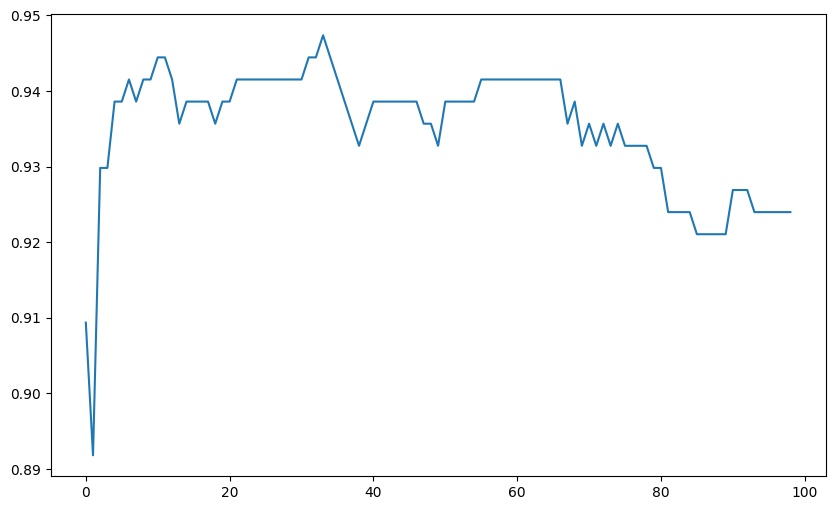

In [10]:

x_train = train[['V3', 'V4', 'V5']]
y_train = train['class']
x_test = test[['V3', 'V4', 'V5']]

fractions_list = []
for amount_neighbors in range(1,100):
  model = skl_nb.KNeighborsClassifier(n_neighbors=amount_neighbors)
  model.fit(x_train,y_train)
  test_prediction = model.predict(x_test)
  frac_correct = np.sum(test_prediction == test['class'])/test.shape[0]
  fractions_list.append(frac_correct)


plt.plot(fractions_list)






## h) ROC for logistic regression
Use a `for`-loop to explore how the true and false positive rates in logistic regression are affected by different threshold values, and plot the result as a `ROC curve`. (see Figure 4.7 and Table 4.1 in the book).

117
225
117
201
116
69
116
56
115
39
115
37
115
37
114
32
114
32
113
23
113
21
113
19
113
19
113
16
113
15
113
14
113
14
112
14
111
13
111
13
111
13
111
13
110
11
109
11
109
11
109
11
109
11
109
11
109
11
109
11
109
11
109
11
108
11
108
11
108
11
108
11
108
11
108
10
106
10
106
10
106
10
106
10
106
10
106
10
106
10
106
10
106
10
105
10
105
10
105
9
105
9
105
9
104
9
104
9
104
9
104
9
104
9
104
9
104
9
104
9
104
9
104
9
104
9
104
9
104
9
104
9
104
9
104
9
104
9
104
9
104
8
104
8
104
8
103
8
102
8
101
7
99
7
99
7
99
7
98
7
98
7
98
7
98
7
97
7
96
7
96
7
94
7
92
6
91
5
90
5
89
5
88
5
87
4
85
4
85
4
83
4
82
4
76
4
73
4
67
0
0
0


/tmp/ipython-input-1094330595.py:25: RuntimeWarning: invalid value encountered in scalar divide
  true_positives_rate.append(true_positives/(true_positives + false_negatives))
/tmp/ipython-input-1094330595.py:26: RuntimeWarning: invalid value encountered in scalar divide
  false_positives_rate.append(false_positives/(false_positives + true_negatives))


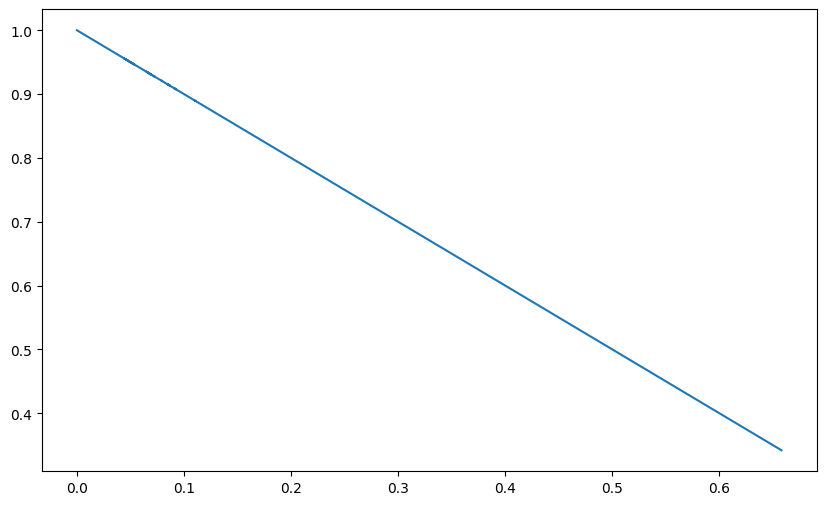

In [27]:

x_train = train[['V3', 'V4', 'V5']]
y_train = train['class']
model = skl_lm.LogisticRegression()
positive_class = 'malignant'
negative_class = 'benign'
model.fit(x_train,y_train)

threshold = np.linspace(0.00, 1, 101)

x_test = test[['V3', 'V4', 'V5']]

true_positives_rate = []
false_positives_rate = []
predict_prob = model.predict_proba(x_test)
positive_class_index = np.argwhere(model.classes_ == positive_class).squeeze()

for r in threshold:
  test_prediction = np.where(predict_prob[:,positive_class_index] > r, positive_class, negative_class);
  true_positives = np.sum((test_prediction == positive_class) & (test_prediction == test['class']))
  false_positives = np.sum(test_prediction == positive_class) - true_positives
  true_negatives = np.sum((test_prediction == positive_class) & (test_prediction == test['class']))
  false_negatives = np.sum(test_prediction == positive_class) - true_negatives
  print(true_negatives)
  print(false_negatives)
  true_positives_rate.append(true_positives/(true_positives + false_negatives))
  false_positives_rate.append(false_positives/(false_positives + true_negatives))



plt.plot(false_positives_rate, true_positives_rate);








## i)
Try to find another set of inputs (perhaps by also considering transformations of the attributes) which gives a better result than you have achieved so far. You may also play with the threshold values. (“Better” is on purpose left vague. For this problem, the implications of a false negative (=`benign`) misclassification is probably more severe than a false positive (=`malignant`) misclassification.)

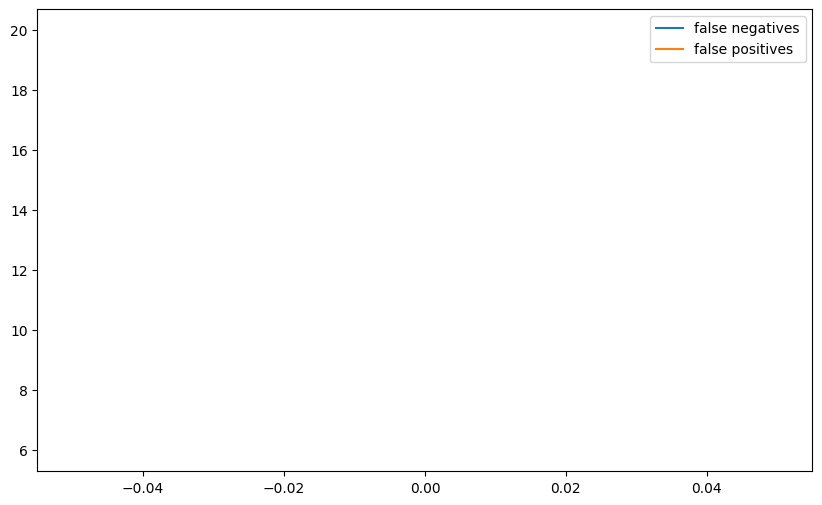

In [13]:

x_train = train[['V3', 'V4', 'V5']]
y_train = train['class']
x_test = test[['V3', 'V4', 'V5']]

true_positives_rate = []
false_positives_rate = []
for amount_neighbors in range(1,100):
  model = skl_nb.KNeighborsClassifier(n_neighbors=amount_neighbors)
  model.fit(x_train,y_train)
  test_prediction = model.predict(x_test)
  true_positives = np.sum((test_prediction == 'malignant') & (test_prediction == test['class']))
  false_positives = np.sum(test_prediction == 'malignant') - true_positives
  true_negatives = np.sum((test_prediction == 'benign') & (test_prediction == test['class']))
  false_negatives = np.sum(test_prediction == 'benign') - true_negatives
  true_positives_rate.append(true_positives/(true_positives + false_negatives))
  false_positives_rate.append(false_positives/(false_positives + true_negatives))


plt.plot(false_negatives, label='false negatives')
plt.plot(false_positives, label='falsee positives')
plt.legend()




# 4.2 Decision boundaries
The following code generates some data with $x_1$ and $x_2$ both in $[0, 10]$ and $y$ either $0$ or $1$, and plots the decision boundary for a logistic regression model.

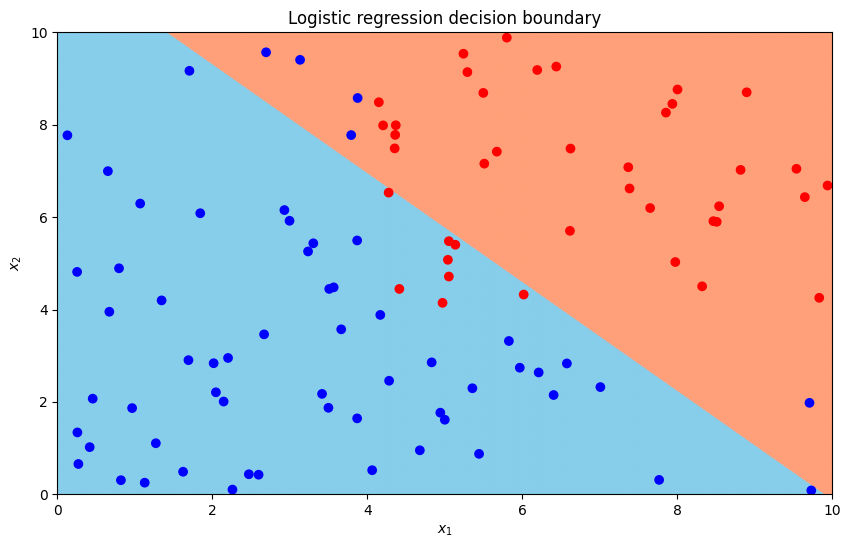

In [44]:
# generate data
np.random.seed(2)
N = 100
x1 = np.random.uniform(0, 10, N)
x2 = np.random.uniform(0, 10, N)
y = np.ones(N)
y[x1<4] = 0
y[x2<4] = 0
X = pd.DataFrame({'x1': x1, 'x2': x2})


# learn a logistic regression model
model = skl_lm.LogisticRegression(solver='lbfgs')
model.fit(X, y)

# classify the points in the whole domain
res = 0.01   # resolution of the squares
xs1 = np.arange(0, 10 + res, res)
xs2 = np.arange(0, 10 + res, res)
xs1, xs2 = np.meshgrid(xs1, xs2)    # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
prediction = model.predict(X_all)

from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])
plt.imshow(prediction.reshape(xs1.shape[0],-1),
           cmap=mycmap,
           origin='lower',
           extent=[0,10,0,10],
           aspect='auto')

# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr') # blue - white -red colormap

plt.title('Logistic regression decision boundary')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## (a)
Run the code and verify that it reproduces the figure, and make sure you understand the figure. What is the misclassification rate here?

In [45]:
y_hat = model.predict(X)
missclassification_rate = 100*np.sum(y_hat != y) / y.shape[0]
print('missclassification rate:', missclassification_rate)

missclassification rate: 13.0


## (b)
Modify the code to plot the decision boundary for a LDA classifier. What differences do you see? What is the misclassification rate?

missclasification rate: 11.0 %


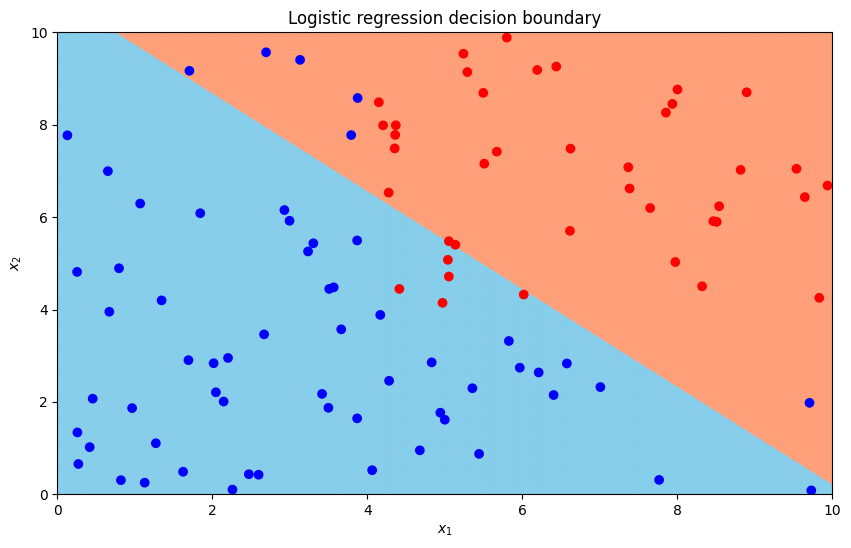

In [46]:
# generate data
np.random.seed(2)
N = 100
x1 = np.random.uniform(0, 10, N)
x2 = np.random.uniform(0, 10, N)
y = np.ones(N)
y[x1<4] = 0
y[x2<4] = 0
X = pd.DataFrame({'x1': x1, 'x2': x2})


# learn a logistic regression model
model = skl_da.LinearDiscriminantAnalysis()
model.fit(X, y)

# classify the points in the whole domain
res = 0.01   # resolution of the squares
xs1 = np.arange(0, 10 + res, res)
xs2 = np.arange(0, 10 + res, res)
xs1, xs2 = np.meshgrid(xs1, xs2)    # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
prediction = model.predict(X_all)

#how good is it?

y_hat = model.predict(X)

missclassification_rate = 100*np.sum(y_hat != y) / y.shape[0]
print('missclasification rate:', missclassification_rate, '%')

from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])
plt.imshow(prediction.reshape(xs1.shape[0],-1),
           cmap=mycmap,
           origin='lower',
           extent=[0,10,0,10],
           aspect='auto')

# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr') # blue - white -red colormap

plt.title('Logistic regression decision boundary')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## (c)
Modify the code to plot the decision boundary for a QDA classifier. What differences do you see? What is the misclassification rate?

missclasification rate: 9.0 %


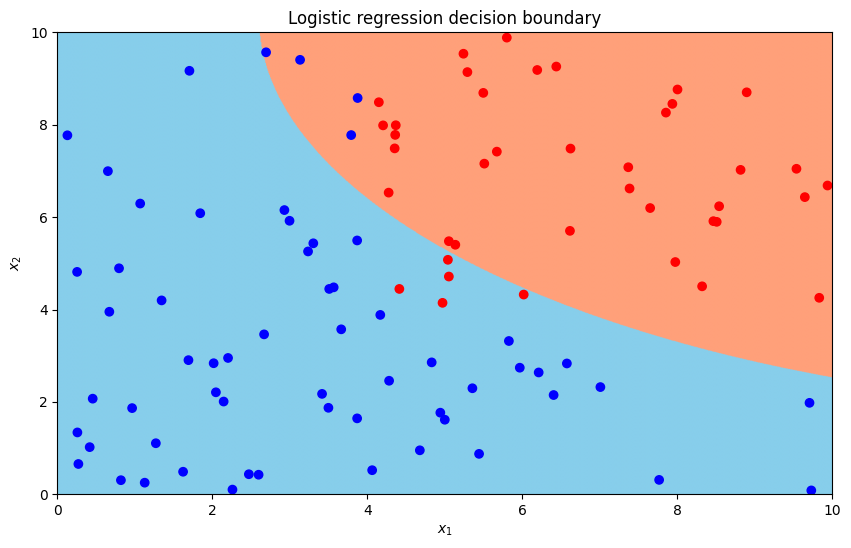

In [47]:
# generate data
np.random.seed(2)
N = 100
x1 = np.random.uniform(0, 10, N)
x2 = np.random.uniform(0, 10, N)
y = np.ones(N)
y[x1<4] = 0
y[x2<4] = 0
X = pd.DataFrame({'x1': x1, 'x2': x2})


# learn a logistic regression model
model = skl_da.QuadraticDiscriminantAnalysis()
model.fit(X, y)

# classify the points in the whole domain
res = 0.01   # resolution of the squares
xs1 = np.arange(0, 10 + res, res)
xs2 = np.arange(0, 10 + res, res)
xs1, xs2 = np.meshgrid(xs1, xs2)    # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
prediction = model.predict(X_all)

#how good is it?

y_hat = model.predict(X)

missclassification_rate = 100*np.sum(y_hat != y) / y.shape[0]
print('missclasification rate:', missclassification_rate, '%')

from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])
plt.imshow(prediction.reshape(xs1.shape[0],-1),
           cmap=mycmap,
           origin='lower',
           extent=[0,10,0,10],
           aspect='auto')

# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr') # blue - white -red colormap

plt.title('Logistic regression decision boundary')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## (d)
Modify the code to plot the decision boundary for a $k$-NN classifier. What differences do you see? What is the misclassification rate?

missclasification rate: 3.0 %


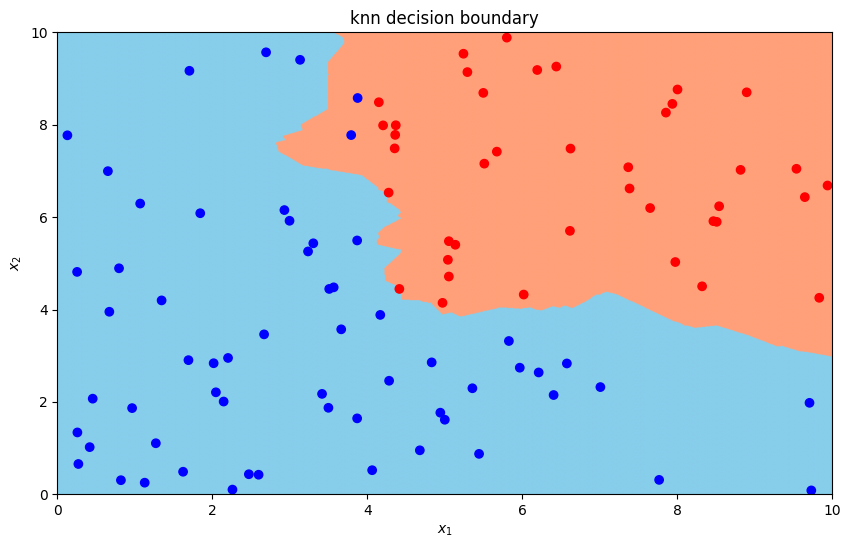

In [54]:
# generate data
np.random.seed(2)
N = 100
x1 = np.random.uniform(0, 10, N)
x2 = np.random.uniform(0, 10, N)
y = np.ones(N)
y[x1<4] = 0
y[x2<4] = 0
X = pd.DataFrame({'x1': x1, 'x2': x2})


# learn a knn model
amount_neighbors = 10
model = skl_nb.KNeighborsClassifier(n_neighbors=amount_neighbors)
model.fit(X, y)
y_hat = model.predict(X)
missclassification_rate = (100*np.sum(y_hat != y) / y.shape[0])
print('missclasification rate:', missclassification_rate, '%')



# classify the points in the whole domain
res = 0.01   # resolution of the squares
xs1 = np.arange(0, 10 + res, res)
xs2 = np.arange(0, 10 + res, res)
xs1, xs2 = np.meshgrid(xs1, xs2)    # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
prediction = model.predict(X_all)



from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])
plt.imshow(prediction.reshape(xs1.shape[0],-1),
           cmap=mycmap,
           origin='lower',
           extent=[0,10,0,10],
           aspect='auto')

# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr') # blue - white -red colormap

plt.title('knn decision boundary')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## (e)
What happens with the decision boundary for logistic regression if you include the term $x_1x_2$ as an input? What is the misclassification rate?

missclassification rate: 4.0


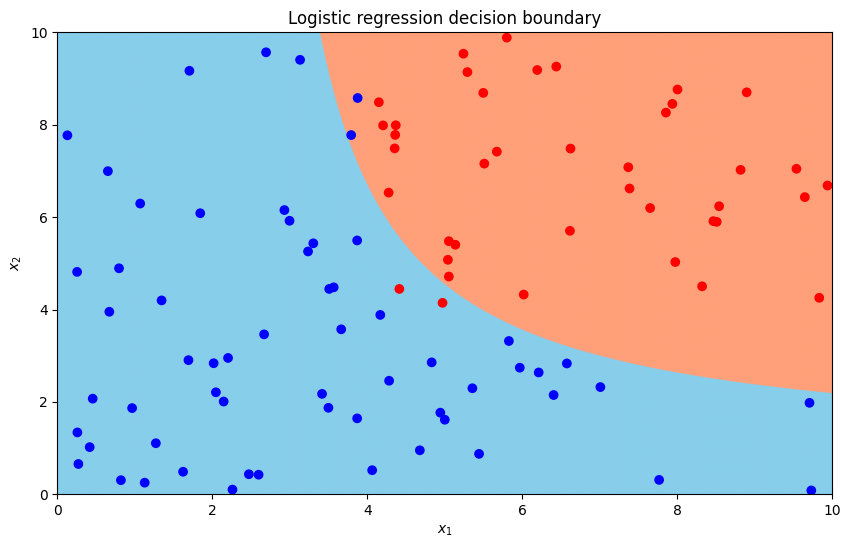

In [59]:
# generate data
np.random.seed(2)
N = 100
x1 = np.random.uniform(0, 10, N)
x2 = np.random.uniform(0, 10, N)
x3 = x1*x2
y = np.ones(N)
y[x1<4] = 0
y[x2<4] = 0
X = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})


# learn a logistic regression model
model = skl_lm.LogisticRegression(solver='lbfgs')
model.fit(X, y)

#how good is it?

y_hat = model.predict(X)
missclassifiacation = 100*np.sum(y_hat != y) / y.shape[0]
print('missclassification rate:', missclassifiacation)

# classify the points in the whole domain
res = 0.01   # resolution of the squares
xs1 = np.arange(0, 10 + res, res)
xs2 = np.arange(0, 10 + res, res)

xs1, xs2 = np.meshgrid(xs1, xs2)    # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
X_all['x3'] = X_all['x1']*X_all['x2']
prediction = model.predict(X_all)

from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])
plt.imshow(prediction.reshape(xs1.shape[0],-1),
           cmap=mycmap,
           origin='lower',
           extent=[0,10,0,10],
           aspect='auto')

# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr') # blue - white -red colormap

plt.title('Logistic regression decision boundary')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

# 4.3 Why not linear regression?
In this exercise, we explore why linear regression might not be well suited for classification problems.

## (a)
Construct and plot a data set as follows: Let $x_i$ be samples $x_i = i$ in a sequence from $i = 1$ to $i = 40$. Let $y_i = 0$ for all $i = 1 : 40$, except for $i = 34, 38, 39, 40$ where $y_i = 1$. Hence, $y$ belongs to either of two classes, $0$ and $1$.

In [64]:
x = np.arange(1,41)
y = np.zeros(40)
for indices_with_ones in [33, 37, 38, 39]:
  y[indices_with_ones] = 1
print('x:', x)
print('y:', y)


x: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.]


## (b)
Now, the problem is to fit a model which is able to predict the output $y$ from the input $x$. Start with a linear regression model (command `skl_lm.LinearRegression()`), and simply threshold its predictions at 0.5 (the average of 0 and 1, the two classes). Plot the prediction. How good is the prediction?

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.]


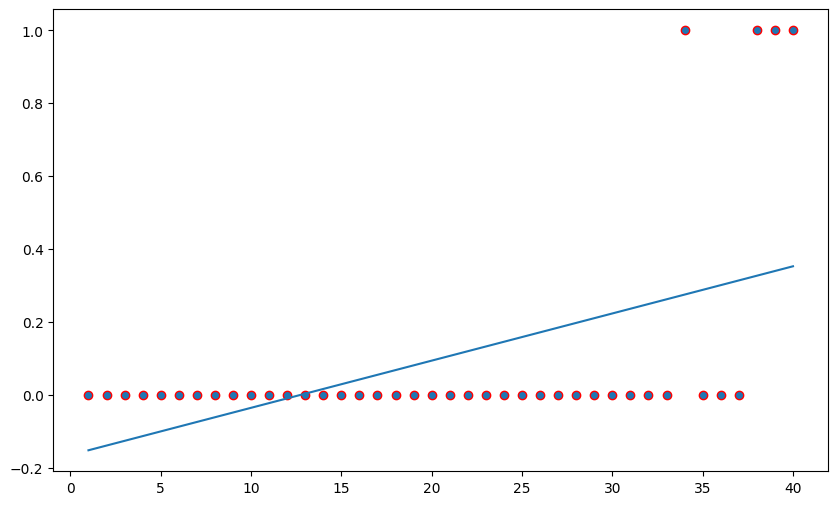

In [79]:
model = skl_lm.LinearRegression()

x_train = x.reshape(-1,1)

model.fit(x_train, y)
print(y)
prediction = model.predict(x_train)
prediction_class = np.zeros(40)
prediction_class[prediction > 0.5] = 1
plt.plot(x, prediction, label='lin.reg')
plt.scatter(x,y, edgecolors='r')

## (c)
Try instead logistic regression using `skl_lm.LogisticRegression()` command (set the parameter `C` to $1000$) and plot the prediction. How good is the prediction, and what advantages does logistic regression have over linear regression for this classification problem?  

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]]


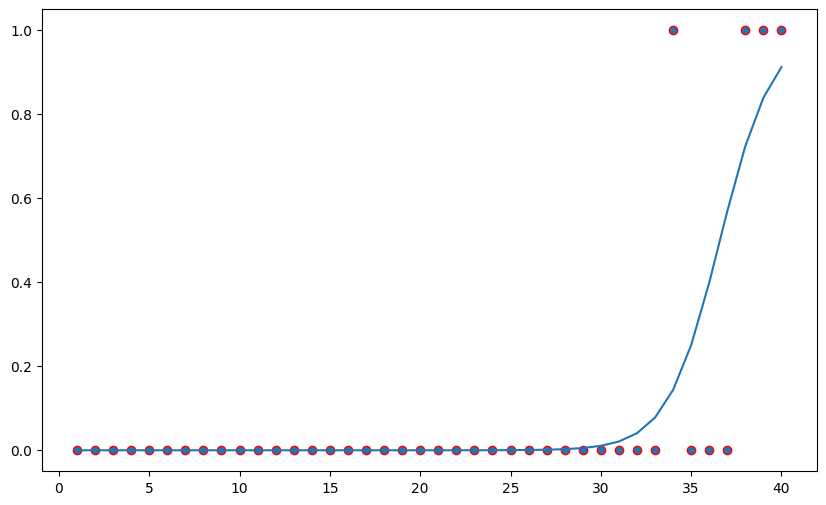

In [91]:
model = skl_lm.LogisticRegression(C=1000)

x_train = x.reshape(-1,1)

model.fit(x_train, y)
print(x_train)
prediction = model.predict(x_train)
prediction_class = np.zeros(40)
prediction_class[prediction > 0.5] = 1
prediction_prob = model.predict_proba(x_train)[:, 1]

plt.plot(x, prediction_prob, label='lin.reg')
plt.scatter(x,y, edgecolors='r')

# 4.4 k-NN
In this exercise, we are going to explore an important user aspect of $k$-NN.

## (a)
Make $200$ draws $x_1$ from a $\mathcal{N}(0, 1^2)$ distribution, and $200$ draws $x_2$ from $\mathcal{N}(0, 10^4)$. Also construct $y$ such that $y = 1$ if $x_1 \cdot x_2$ is positive, and $0$ otherwise. Split the data set randomly into a test and a training data set (equally sized).

In [94]:
x1 = np.random.normal(0, 1, 200)
x2 = np.random.normal(0, np.sqrt(10**4), 200)
y = np.zeros(200)
y[x1*x2 > 0] = 1
np.random.seed(1)
train_indices = np.random.choice(200, 100, replace=False)
train = pd.DataFrame({'x1': x1[train_indices], 'x2': x2[train_indices]})
test = pd.DataFrame({'x1': x1[~train_indices], 'x2': x2[~train_indices]})
print(train)


          x1          x2
0  -0.426393   89.325533
1   1.115805  -24.738758
2  -2.110822 -101.307133
3  -0.808384  -18.074238
4   1.771637  -44.903780
..       ...         ...
95  2.457763  -36.268147
96  0.963024   42.679515
97 -0.413074 -110.890847
98  0.380322   30.498179
99  2.273708   53.722479

[100 rows x 2 columns]


## (b)
Use $k$-NN (choose $k$ yourself) to predict the test output $y$ using $x_1$ and $x_2$ as inputs. How well do you perform?

## (c)
Now replace $x_2$ with $200$ draws from $\mathcal{N}(0, 1^2)$, and perform $k$-NN classification anew. How well do you perform this time? Explain the difference!

## (d)
Explore how the `sklearn.preprocessing.scale()` function can help for such problems encountered in (b)!

# 4.5 Multiclass classification
In the course, we have focused on the classification problem for 2 classes. The methods can, however, be generalized to more than two classes. In `Python`, the commands `skl_da.LinearDiscriminantAnalysis()`, `skl_da.QuadraticDiscriminantAnalysis()` and `skl_nb.KNeighborsClassifier()` can all be used directly for multi-class problems as well, which we will do in this exercise.

## (a)
Load and familiarize yourself with the data set `iris`, and split it randomly into a training and a test data set.

**Description**

This famous (Fisher's or Anderson's) `iris` data set gives the measurements in centimeters of the variables sepal length and width and petal length and width, respectively, for $50$ flowers from each of $3$ species of iris. The species are Iris setosa, versicolor, and virginica.

**Format**

iris is a data frame with $150$ cases (rows) and $5$ variables (columns) named `Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

In [ ]:
# url = 'data/iris.csv'
url = 'https://uu-sml.github.io/course-sml-public/data/iris.csv'
iris = pd.read_csv(url)

## (b)
Use all inputs (`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`) to predict the output `Species` (`setosa`,
`versicolor` and `virginica`) using LDA, QDA, and $k$-NN, respectively.